# Performance Management: A Qiskit Function by Q-CTRL Fire Opal

<LegacyContent>
<Admonition type="note">
This documentation is relevant to IBM Quantum&reg; Platform Classic. If you need the newer version, go to the new [IBM Quantum Platform documentation.]( https://quantum.cloud.ibm.com/docs/guides/q-ctrl-performance-management)
</Admonition>
</LegacyContent>
<CloudContent>
<Admonition type="note">
This documentation is relevant to the new IBM Quantum&reg; Platform. If you need the previous version, return to the [IBM Quantum Platform Classic documentation.](https://docs.quantum.ibm.com/guides/q-ctrl-performance-management)
</Admonition>
</CloudContent>
<Admonition type="note">
Qiskit Functions are an experimental feature available only to IBM Quantum&reg; Premium Plan users. They are in preview release status and subject to change.
</Admonition>

## Overview

Fire Opal Performance Management makes it simple for anyone to achieve meaningful results from quantum computers at scale without needing to be quantum hardware experts. When running circuits with Fire Opal Performance Management, AI-driven error suppression techniques are automatically applied, enabling the scaling of larger problems with more gates and qubits. This approach reduces the number of shots required to reach the correct answer, with no added overhead — resulting in significant savings in both compute time and cost.

Performance Management suppresses errors and increases the probability of getting the correct answer on noisy hardware. In other words, it increases the signal-to-noise ratio. The following image shows how increased accuracy enabled by Performance Management can reduce the need for additional shots in the case of a 10-qubit Quantum Fourier Transform algorithm. With only 30 shots, Q-CTRL reaches the 99% confidence threshold, whereas the default (`QiskitRuntime` Sampler, `optimization_level`=3 and `resilience_level`=1, `ibm_sherbrooke`) requires 170,000 shots. By getting the right answer faster, you save significant compute runtime.

![Visualization of the improved runtime](/images/guides/qctrl-performance-management/achieve_more.svg)

The Performance Management function can be used with any algorithm, and you can easily use it in place of the standard [Qiskit Runtime primitives](./primitives). Behind the scenes, multiple error suppression techniques work together to prevent errors from happening at runtime. All Fire Opal pipeline methods are pre-configured and algorithm-agnostic, meaning you always get the best performance out of the box.

To get access to Performance Management, [contact Q-CTRL](https://form.typeform.com/to/uOAVDnGg?typeform-source=q-ctrl.com).

## Description

Fire Opal Performance Management has two options for execution that are similar to the Qiskit Runtime primitives, so you can easily swap in the Q-CTRL Sampler and Estimator. The general workflow for using the Performance Management function is:
1. Define your circuit (and operators in the case of the Estimator).
2. Run the circuit.
3. Retrieve the results.

To reduce hardware noise, Fire Opal employs a range of AI-driven error suppression techniques depicted in the following image. With Fire Opal, the entire pipeline is completely automated with zero need for configuration.

Fire Opal's pipeline eliminates the need for additional overhead, such as increased quantum runtime or extra physical qubits. Note that classical processing time remains a factor (refer to the [Benchmarks](#benchmarks) section for estimates, where "Total time" reflects both classical and quantum processing). In contrast to error mitigation, which requires overhead in the form of sampling, Fire Opal's error suppression works at both the gate and pulse levels to address various sources of noise and to prevent the likelihood of an error occurring. By preventing errors, the need for expensive post-processing is eliminated.

The following image depicts the error suppression methods automated by Fire Opal Performance Management.

![Visualization of the error suppression pipeline](/images/guides/qctrl-performance-management/error_suppression.svg)

The function offers two primitives, Sampler and Estimator, and the inputs and outputs of both extend the implemented spec for [Qiskit Runtime V2 primitives](/guides/primitive-input-output).

## Benchmarks

[Published algorithmic benchmarking](https://journals.aps.org/prapplied/abstract/10.1103/PhysRevApplied.20.024034) results demonstrate significant performance improvement across various algorithms, including Bernstein-Vazirani, quantum Fourier transform, Grover’s search, quantum approximate optimization algorithm, and variational quantum eigensolver. The rest of this section provides more details about types of algorithms you can run, as well as the expected performance and runtimes.

The following independent studies demonstrate how Q-CTRL's Performance Management enables algorithmic research at record-breaking scale:
- [Parametrized Energy-Efficient Quantum Kernels for Network Service Fault Diagnosis](https://arxiv.org/abs/2405.09724v1) - up to 50-qubit quantum kernel learning
- [Tensor-based quantum phase difference estimation for large-scale demonstration](https://arxiv.org/abs/2408.04946) - up to 33-qubit quantum phase estimation
- [Hierarchical Learning for Quantum ML: Novel Training Technique for Large-Scale Variational Quantum Circuits](https://arxiv.org/abs/2311.12929) - up to 21-qubit quantum data loading

The following table provides a rough guide on accuracy and runtimes from prior benchmarking runs on `ibm_fez`. Performance on other devices may vary. The usage time is based on an assumption of 10,000 shots per circuit. The "Number of qubits" indicated is not a hard limitation but represents rough thresholds where you can expect extremely consistent solution accuracy. Larger problem sizes have been successfully solved, and testing beyond these limits is encouraged.


| Example    | Number of qubits | Accuracy | Measure of accuracy | Total time (s) | Runtime usage (s) | Primitive (Mode) |
| ---------  | ---------------- | -------------------------- | -------- | ---------- | ------------- |------------- |
| Bernstein–Vazirani  |  50Q    | 100%  | Success Rate (Percentage of runs where the correct answer is the highest count bitstring)     | 10    | 8         | Sampler |
| Quantum Fourier Transform | 30Q              | 100% | Success Rate (Percentage of runs where the correct answer is the highest count bitstring)      | 10    | 8        | Sampler |
| Quantum Phase Estimation  | 30Q   | 99.9998%  | Accuracy of the angle found: `1- abs(real_angle - angle_found)/pi`  | 10  | 8  | Sampler |
| Quantum simulation: Ising model (15 steps) | 20Q  | 99.775%   |  $A$ (defined below)  |  60 (per step)  | 15 (per step)   | Estimator |
| Quantum simulation 2: molecular dynamics (20 time points) | 34Q  |  96.78%  |  $A_{mean}$ (defined below)   | 10 (per time point)    | 6 (per time point)  | Estimator |

Defining the accuracy of the measurement of an expectation value - the metric $A$ is defined as follows:
$$
A = 1 - \frac{|\epsilon^{ideal} - \epsilon^{meas}|}{\epsilon^{ideal}_{max} - \epsilon^{ideal}_{min}},
$$
where $ \epsilon^{ideal} $ = ideal expectation value,  $ \epsilon^{meas} $ = measured expectation value, $\epsilon^{ideal}_{max} $ = ideal maximum value, and $\epsilon^{ideal}_{min}$ = ideal minimum value. $A_{mean}$ is simply the average of the value of $A$ across multiple measurements.

This metric is used because it is invariant to global shifts and scaling in the range of attainable values. In other words, regardless of whether you shift the range of possible expectation values higher or lower or increase the spread, the value of $A$ should remain consistent.

## Get started
<LegacyContent>
Authenticate using your [IBM Quantum Platform API key](http://quantum.ibm.com/), and select the Qiskit Function as follows:
</LegacyContent>
<CloudContent>
Authenticate using your [IBM Quantum Platform API key](http://quantum.cloud.ibm.com/), and select the Qiskit Function as follows:
</CloudContent>

In [1]:
from qiskit_ibm_catalog import QiskitFunctionsCatalog

catalog = QiskitFunctionsCatalog()

# Access Function
perf_mgmt = catalog.load("q-ctrl/performance-management")

## Estimator primitive

### Estimator example

Use Fire Opal Performance Management's Estimator primitive to determine the expectation value of a single circuit-observable pair.

In addition to the `qiskit-ibm-catalog` and `qiskit` packages, you will also use the `numpy` package to run this example. You can install this package by uncommenting the following cell if you are running this example in a notebook using the IPython kernel.

In [2]:
# %pip install numpy

**1. Create the circuit**

As an example, generate a random Hermitian operator and an observable to input to the Performance Management function.

In [3]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.quantum_info import random_hermitian, SparsePauliOp

n_qubits = 50

# Generate a random circuit
mat = np.real(random_hermitian(n_qubits, seed=1234))
circuit = IQP(mat)
circuit.measure_all()

# Define observables as a string
observable = SparsePauliOp("Z" * n_qubits)

In [4]:
# Create PUB tuple
estimator_pubs = [(circuit, observable)]

**2. Run the circuit**

Run the circuit and optionally define the backend and number of shots.

In [5]:
# This cell is hidden from users
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
instance = service.active_account()["instance"]
backend_name = service.least_busy().name

In [6]:
# Run the circuit using the estimator
qctrl_estimator_job = perf_mgmt.run(
    primitive="estimator",
    pubs=estimator_pubs,
    instance=instance,
    backend_name=backend_name,  # E.g. "ibm_kyiv", or omit to default to the least busy device
)

You can use the familiar [Qiskit Serverless APIs](./serverless) to check your Qiskit Function workload's status:

In [7]:
qctrl_estimator_job.status()

'QUEUED'

**3. Retrieve the result**

In [8]:
# Retrieve the counts from the result list
result = qctrl_estimator_job.result()

The results have the same format as an [Estimator result](/guides/primitive-input-output#estimator-output):

In [9]:
print(
    f"The result of the submitted job had {len(result)} PUB and has a value:\n {result}\n"
)
print(
    f"The associated PubResult of this job has the following DataBins:\n {result[0].data}\n"
)
print(f"And this DataBin has attributes: {result[0].data.keys()}")
print(
    f"The expectation values measured from this PUB are: \n{result[0].data.evs}"
)

The result of the submitted job had 1 PUB and has a value:
 PrimitiveResult([PubResult(data=DataBin(evs=0.013, stds=0.9999154964295733), metadata={'precision': None})], metadata={})

The associated PubResult of this job has the following DataBins:
 DataBin(evs=0.013, stds=0.9999154964295733)

And this DataBin has attributes: dict_keys(['evs', 'stds'])
The expectation values measured from this PUB are: 
0.013


### Estimator inputs
<Admonition type="caution">Fire Opal Performance Management accepts abstract circuits, in contrast to the native Qiskit Runtime primitives, which only accept circuits that are written in the target backend’s Instruction Set Architecture (ISA). For best results, do not transpile circuits before submitting via the Performance Management function. </Admonition>

<LegacyContent>
| Name  | Type  | Description | Required | Default  | Example |
|------|------|----------|----------|-----------|-----------|
| pubs       | `QctrlEstimatorPubLike` or `list[QctrlEstimatorPubLike]` | One or more tuples containing the inputs listed under `EstimatorPubLike` components   | Yes   | N/A   | `(circuit, observables, parameter_values)`   |
| instance   | `str`   | The hub/group/project to use in that format  | No  | A Premium access instance is randomly chosen if your account has access to multiple instances | `"<hub1/group1/project1>"`     |
| backend_name| `str`  | The name of the backend | No  |  The least busy backend that your instance has access to | `"ibm_fez"` |
| options| `dict`  | Input options; see Options section for more details | No  |  See the Options section for details | `{"default_shots": 2048}` |
</LegacyContent>
<CloudContent>
| Name  | Type  | Description | Required | Default  | Example |
|------|------|----------|----------|-----------|-----------|
| pubs       | `QctrlEstimatorPubLike` or `list[QctrlEstimatorPubLike]` | One or more tuples containing the inputs listed under `EstimatorPubLike` components   | Yes   | N/A   | `(circuit, observables, parameter_values)`   |
| instance   | `str`   | The compute resource number of the instance to use in that format  | No  | A Premium access instance is randomly chosen if your account has access to multiple instances | `"CRN"`     |
| backend_name| `str`  | The name of the backend | No  |  The least busy backend that your instance has access to | `"ibm_fez"` |
| options| `dict`  | Input options; see Options section for more details | No  |  See the Options section for details | `{"default_shots": 2048}` |
</CloudContent>
**`QctrlEstimatorPubLike` components (derived from the [Qiskit Runtime PUB definition](/guides/primitive-input-output#estimator-pub)):**
- A single circuit defined as a `QuantumCircuit` or in OpenQASM 2.0 or 3.0 string format.
- One or more observables that specify the expectation values to estimate, in any of the formats denoted in the list "Supported observables formats".
- (Optional) A collection of parameter values to bind the circuit against, which follow the same [array broadcasting rules](./primitive-input-output#broadcasting-rules) as the `QiskitRuntime` primitives.
- (Optional) A target precision for expectation values to estimate.
- (Optional) A real number representing the precision, or a dictionary of run options containing the shot count. For example: `{"shots": <int>}`.

**Supported observables formats:**
- Any one of the `ObservablesArrayLike` formats, such as `Pauli`, `SparsePauliOp`, `PauliList`, or `str`
- A Pauli string: `"XY"`
- A dictionary - Pauli strings with coefficients: `{"XY": 0.5, "YZ": 0.3}`
- A list of Pauli strings: `["XY", "YZ", "ZX"]`
- A list of Pauli strings with coefficients: `[("XY", 0.5), ("YZ", 0.3)]`
- A nested list of Pauli strings: `[["XY", "YZ"], ["ZX", "XX"]]`
- A nested list of Pauli strings with coefficients: `[[("XY", 0.1), ("YZ", 0.2)], [("ZX", 0.3), ("XX", 0.4)]]`

**Supported backends:**
The following list of backends are currently supported. If your device is not listed, [reach out to Q-CTRL](https://form.typeform.com/to/iuujEAEI?typeform-source=q-ctrl.com) to add support.
- ibm_brisbane
- ibm_brussels
- ibm_cleveland
- ibm_fez
- ibm_kawasaki
- ibm_kyiv
- ibm_nazca
- ibm_quebec
- ibm_rensselaer
- ibm_sherbrooke
- ibm_strasbourg
- ibm_torino

**Options:**
| Name   | Type   | Description  | Default |
|--------|----------|-----------------------|---------------------|
| session_id | `str`  | An existing Qiskit Runtime session ID  | `"cw4r3je6f0t010870y3g"` |
| default_shots | `int`  | The number of shots to use for each circuit  | `2048` |
| default_precision | `float`  | The target precision for expectation values to estimate for each circuit  | `0.015625` |
| job_tags | `list[str]` | A list of job tags | `[]`|

### Estimator outputs
| Name   | Type   | Description  | Example |
|--------|---------------------------------|------------------------------------|---------------------|
| N/A | `PrimitiveResult`  | The [`PrimitiveResult`](/api/qiskit/qiskit.primitives.PrimitiveResult) corresponding to the list of input PUBs | `PubResult(data=DataBin(evs=[0.1234], stds=[0.1]))` |

## Sampler primitive

### Sampler example

Use Fire Opal Performance Management's Sampler primitive to run a Bernstein–Vazirani circuit. This algorithm, used to find a hidden string from the outputs of a black box function, is a common benchmarking algorithm because there is a single correct answer.

**1. Create the circuit**

Define the correct answer to the algorithm, the hidden bitstring, and the Bernstein–Vazirani circuit. You can adjust the width of the circuit by simply changing the `circuit_width`.

In [10]:
import qiskit

circuit_width = 35
hidden_bitstring = "1" * circuit_width

# Create circuit, reserving one qubit for BV oracle
bv_circuit = qiskit.QuantumCircuit(circuit_width + 1, circuit_width)
bv_circuit.x(circuit_width)
bv_circuit.h(range(circuit_width + 1))
for input_qubit, bit in enumerate(reversed(hidden_bitstring)):
    if bit == "1":
        bv_circuit.cx(input_qubit, circuit_width)
bv_circuit.barrier()
bv_circuit.h(range(circuit_width + 1))
bv_circuit.barrier()
for input_qubit in range(circuit_width):
    bv_circuit.measure(input_qubit, input_qubit)

# Create PUB tuple
sampler_pubs = [(bv_circuit,)]

**2. Run the circuit**

Run the circuit and optionally define the backend and number of shots.

In [11]:
# Run the circuit using the sampler
qctrl_sampler_job = perf_mgmt.run(
    primitive="sampler",
    pubs=sampler_pubs,
    instance=instance,
    backend_name=backend_name,  # Such as "ibm_kyiv", or omit to default to the least busy device
)

Check your Qiskit Function workload's [status](/guides/functions#check-job-status) or return [results](/guides/functions#retrieve-results) as follows:

In [12]:
qctrl_sampler_job.status()

'QUEUED'

**3. Retrieve the result**

In [13]:
# Retrieve the job results
sampler_result = qctrl_sampler_job.result()

In [14]:
# Get results for the first (and only) PUB
pub_result = sampler_result[0]
counts = pub_result.data.c.get_counts()

print(f"Counts for the meas output register: {counts}")

Counts for the meas output register: {'00000000000000000000000000000000000': 1, '00000000000000000000000000000000001': 1, '00000000000000000000000000000000010': 1, '00000000000000000000000000000000011': 1, '00000000000000000000000000000001101': 1, '00000000000000000000000000000011111': 1, '00000000000000000000000000000101100': 1, '00000000000000000000000000000111001': 1, '00000000000000000000000000000111110': 1, '00000000000000000000000000001011101': 1, '00000000000000000000000000001110110': 1, '00000000000000000000000000001111101': 1, '00000000000000000000000000001111110': 1, '00000000000000000000000000010111111': 1, '00000000000000000000000000011011111': 1, '00000000000000000000000000100000000': 1, '00000000000000000000000000100000010': 1, '00000000000000000000000000100001110': 1, '00000000000000000000000000111101001': 1, '00000000000000000000000000111111110': 1, '00000000000000000000000001001111111': 1, '00000000000000000000000001011011111': 1, '00000000000000000000000001011111101':

**3. Plot the top bitstrings**

Plot the bitstring with the highest counts to see if the hidden bitstring was the mode.

In [15]:
import matplotlib.pyplot as plt


def plot_top_bitstrings(counts_dict, hidden_bitstring=None):
    # Sort and take the top 100 bitstrings
    top_100 = sorted(counts_dict.items(), key=lambda x: x[1], reverse=True)[
        :100
    ]
    if not top_100:
        print("No bitstrings found in the input dictionary.")
        return

    # Unzip the bitstrings and their counts
    bitstrings, counts = zip(*top_100)

    # Assign colors: purple if the bitstring matches hidden_bitstring, otherwise gray
    colors = [
        "#680CE9" if bit == hidden_bitstring else "gray" for bit in bitstrings
    ]

    # Create the bar plot
    plt.figure(figsize=(15, 8))
    plt.bar(
        range(len(bitstrings)), counts, tick_label=bitstrings, color=colors
    )

    # Rotate the bitstrings for better readability
    plt.xticks(rotation=90, fontsize=8)
    plt.xlabel("Bitstrings")
    plt.ylabel("Counts")
    plt.title("Top 100 Bitstrings by Counts")

    # Show the plot
    plt.tight_layout()
    plt.show()

The hidden bitstring is highlighted in purple, and it should be the bitstring with the highest number of counts.

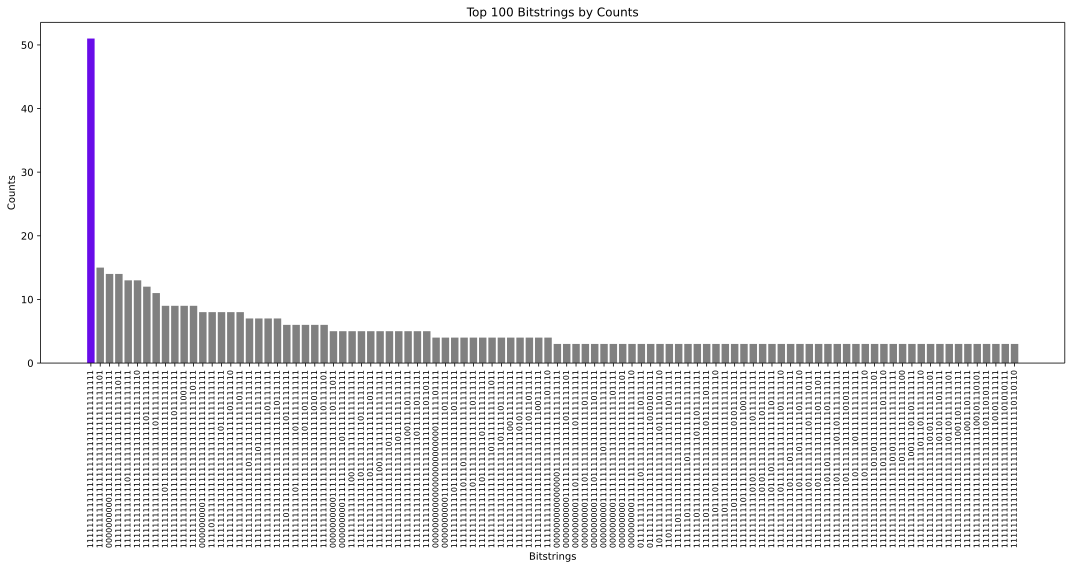

In [16]:
plot_top_bitstrings(counts, hidden_bitstring)

### Sampler inputs
<Admonition type="caution">Fire Opal Performance Management accepts abstract circuits, in contrast to the native Qiskit Runtime primitives, which only accept circuits that are written in the target backend’s Instruction Set Architecture (ISA). For best results, do not transpile circuits before submitting via the Performance Management function. </Admonition>

<LegacyContent>
| Name       | Type            | Description | Required | Default | Example |
|------------|---------------|------------------|----------|----------|--------------------|
| pubs       | `QctrlSamplerPubLike` or `list[QctrlSamplerPubLike]`   | One or more tuples containing the inputs listed under `SamplerPubLike` components     | Yes      | N/A | `(circuit, parameter_values)`            |
| instance   | `str`     | The hub/group/project to use in that format        | No | A Premium access instance is randomly chosen if your account has access to multiple instances     | `"hub/group/project"`   |
| backend_name| `str`  | The name of the backend | No  |  The least busy backend that your instance has access to | `"ibm_fez"` |
| options| `dict`  | Input options; see Options section for more details | No  |  See the Options section for details | `{"default_shots": 2048}` |
</LegacyContent>
<CloudContent>
| Name       | Type            | Description | Required | Default | Example |
|------------|---------------|------------------|----------|----------|--------------------|
| pubs       | `QctrlSamplerPubLike` or `list[QctrlSamplerPubLike]`   | One or more tuples containing the inputs listed under `SamplerPubLike` components     | Yes      | N/A | `(circuit, parameter_values)`            |
| instance   | `str`     | The cloud resource name to use in that format        | No | A Premium access instance is randomly chosen if your account has access to multiple instances     | `"CRN"`   |
| backend_name| `str`  | The name of the backend | No  |  The least busy backend that your instance has access to | `"ibm_fez"` |
| options| `dict`  | Input options; see Options section for more details | No  |  See the Options section for details | `{"default_shots": 2048}` |
</CloudContent>
**`QctrlSamplerPubLike` components (derived from the [Qiskit Runtime PUB definition](/guides/primitive-input-output#sampler-pub)):**
- A single circuit defined as a `QuantumCircuit` or in OpenQASM 2.0 or 3.0 string format.
- (Optional) A collection of parameter values to bind the circuit against.
- (Optional) An integer representing the shot count, or a dictionary of runtime options containing the shot count. For example: `(circ, None, 123)` or `(circ, None, {"shots": 123})`.

**Supported backends:**
The following list of backends are currently supported. If your device is not listed, [reach out to Q-CTRL](https://form.typeform.com/to/iuujEAEI?typeform-source=q-ctrl.com) to add support.
- ibm_brisbane
- ibm_brussels
- ibm_cleveland
- ibm_fez
- ibm_kawasaki
- ibm_kyiv
- ibm_nazca
- ibm_quebec
- ibm_rensselaer
- ibm_sherbrooke
- ibm_strasbourg
- ibm_torino

**Options:**
| Name   | Type   | Description  | Default |
|--------|----------|-----------------------|---------------------|
| session_id | `str`  | An existing Qiskit Runtime session ID  | `"cw4r3je6f0t010870y3g"` |
| default_shots | `int`  | The number of shots to use for each circuit  | `2048` |
| job_tags | `list[str]` | The list of desired job tags | `[]` |

### Sampler outputs
| Name   | Type                                   | Description                                                                               | Example                         |
|--------|----------------------------------------|-------------------------------------------------------------------------------------------|---------------------------------|
| N/A | `PrimitiveResult`  | The [`PrimitiveResult`](/api/qiskit/qiskit.primitives.PrimitiveResult) corresponding to the list of input PUBs | `PrimitiveResult([PubResult(data=DataBin(c=BitArray(<shape=(), num_shots=2048, num_bits=35>)), metadata={'shots': 2048})], metadata={})` |

## Get support

For any questions or issues, [contact Q-CTRL](https://form.typeform.com/to/iuujEAEI).

## Next steps

<Admonition type="tip" title="Recommendations">

- Request access to [Q-CTRL Performance Management](https://quantum.ibm.com/functions?id=c750648c-ba44-4137-8c34-4140a3aaa7a9)

</Admonition>